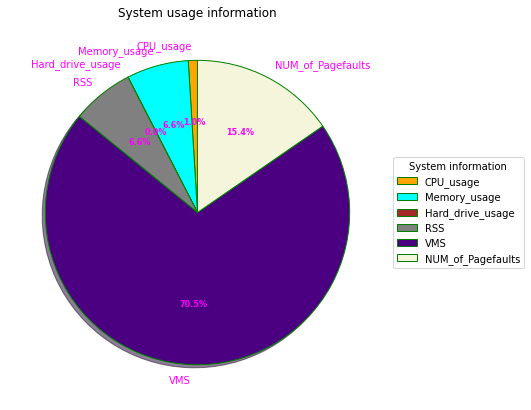

Report for Naive Bayes
----------------------

CPU_Percentage :  1.675 %
--------------

Memory_Usage :  11.420059204101562 %
------------

Disk_Usage :  0.01142578125 %
----------

RSS :  11.420059204101562
----

VMS:  122.26028442382812
----

PageFaults : 26.7126
------------

Classification Report
---------------------

              precision    recall  f1-score   support

          no       0.93      0.90      0.91      7326
         yes       0.34      0.42      0.37       912

    accuracy                           0.85      8238
   macro avg       0.63      0.66      0.64      8238
weighted avg       0.86      0.85      0.85      8238

Confusion Matrix
----------------

[[6584  742]
 [ 532  380]]


Accuracy Score
--------------

0.8453508133042


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import psutil


import time
import psutil
import json
import multiprocessing
import os

from matplotlib import pyplot as plt

def resouce_utilization():
        process_id = os.getpid()
        current_process = psutil.Process()
        CPU_usage = psutil.cpu_percent(interval=2) / psutil.cpu_count()
        Memory_usage = current_process.memory_percent()
        Hard_drive_usage = psutil.disk_usage('/')[3] / 1024
        RSS = current_process.memory_percent(memtype="rss")
        VMS = current_process.memory_percent(memtype="vms")
        NUM_of_Pagefaults = current_process.memory_info()[2] / 10000
        Sys_info = [CPU_usage, Memory_usage, Hard_drive_usage, RSS, VMS, NUM_of_Pagefaults]
        labels = ["CPU_usage", "Memory_usage", "Hard_drive_usage", "RSS", "VMS", "NUM_of_Pagefaults"]

        # Creating explode data
        explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

        # Creating color parameters
        colors = ("orange", "cyan", "brown",
                  "grey", "indigo", "beige")

        # Wedge properties
        wp = {'linewidth': 1, 'edgecolor': "green"}

        # Creating autocpt arguments
        # def func(pct, allvalues):
        # 	absolute = int(pct / 100.*np.sum(allvalues))
        # 	return "{:.1f}%\n({:d} g)".format(pct, absolute)

        # Creating plot
        fig, ax = plt.subplots(figsize=(10, 7))
        wedges, texts, autotexts = ax.pie(Sys_info,
                                          autopct='%2.1f%%',  # lambda pct: func(pct, Sys_info),
                                          # explode = explode,
                                          labels=labels,
                                          shadow=True,
                                          colors=colors,
                                          startangle=90,
                                          wedgeprops=wp,
                                          textprops=dict(color="magenta"))

        # Adding legend
        ax.legend(wedges, labels,
                  title="System information",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8, weight="bold")
        ax.set_title("System usage information")

        # show plot
        plt.show()
        
        

        print("=========================================================================")

        print("Report for Naive Bayes")
        print("----------------------\n")
        print("CPU_Percentage : ",CPU_usage,"%")
        print("--------------\n")
        print("Memory_Usage : ",Memory_usage,"%")
        print("------------\n")
        print("Disk_Usage : ",Hard_drive_usage,"%")
        print("----------\n")
        print("RSS : ",RSS)
        print("----\n")
        print("VMS: ",VMS)
        print("----\n")
        print("PageFaults :",NUM_of_Pagefaults)
        print("------------\n")
            
def naive_bayes():
    bank_df = pd.read_excel('bank_data.xlsx')
    
    #Data Preprocessing
    marital = pd.get_dummies(bank_df['marital'])
    marital = marital[["divorced","married","single"]]
    
    job = pd.get_dummies(bank_df['job'])
    job = job[["admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed" ]]
    
    education = pd.get_dummies(bank_df['education'])
    education = education[["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"]]
    
    default = pd.get_dummies(bank_df['default'])
    default = default[["no","yes"]]
    default.rename(columns={"no": "default_no", "yes": "default_yes"})
    
    housing = pd.get_dummies(bank_df['housing'])
    housing = housing[["no","yes"]]
    housing.rename(columns={"no": "housing_no", "yes": "housing_yes"})
    
    
    loan = pd.get_dummies(bank_df['loan'])
    loan = loan[["no","yes"]]
    loan.rename(columns={"no": "loan_no", "yes": "loan_yes"})
    
    
    contact = pd.get_dummies(bank_df['contact'])
    contact = contact[["cellular","telephone"]]
    
    month = pd.get_dummies(bank_df['month'])
    month = month[["apr","aug","dec","jul","jun","mar","may","nov","oct"]]
    
    day_of_week = pd.get_dummies(bank_df['day_of_week'],drop_first = True)
    
    poutcome = pd.get_dummies(bank_df['poutcome'])
    poutcome = poutcome[["success","failure"]]
    
    #Concatenating and Dropping Columns
    bank_df = pd.concat([bank_df,marital,job,default,housing,loan,education,contact,month,day_of_week,poutcome],axis =1)
    bank_df.drop(['marital','job','default','housing','loan','education','contact','month','day_of_week','poutcome'],axis = 1,inplace = True)
    
    
    X = bank_df.drop("y",axis = 1)
    y = bank_df['y']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=3)
    
    clf = BernoulliNB()
    clf.fit(X_train,Y_train)
    
    
    
    resouce_utilization()
    # Calling psutil.cpu_precent() for 4 seconds
    
    
    print("=========================================================================")
    
    
    
    predictions = clf.predict(X_test)
    
    print("Classification Report")
    print("---------------------\n")
    print(classification_report(Y_test,predictions))
    
    print("Confusion Matrix")
    print("----------------\n")
    print(confusion_matrix(Y_test,predictions))
    print("\n")
    print("Accuracy Score")
    print("--------------\n")
    print(accuracy_score(Y_test,predictions))
    
naive_bayes() 
  